# Exploratory Data Analysis for Immigration Data

This project was first completed as part of a series of hands-on labs required to earn the [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science). Although, slight modifications are made to this version to to help Python beginners understand and follow along easily, however the methodology, libraries, dataset and the overall objective of the project largely remains unchanged. 

Toolkits: This project will rely heavily on the following python libraries:

-  [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer\\&utm_source=Exinfluencer\\&utm_content=000026UJ\\&utm_term=10006555\\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer\\&utm_source=Exinfluencer\\&utm_content=000026UJ\\&utm_term=10006555\\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) for data wrangling and exploratory data analysis. 

-  [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer\\&utm_source=Exinfluencer\\&utm_content=000026UJ\\&utm_term=10006555\\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) - a comprehensive library for creating static, animated, and interactive visualizations from data in Python.

 
Dataset:

-  United Nations' Immigration Dataset from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer\\&utm_source=Exinfluencer\\&utm_content=000026UJ\\&utm_term=10006555\\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01). The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. This project will focus on the Canadian Immigration data.

### 1. Import Libraries and Load Data

In [1]:
# Import libraries
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python

**download xlrd module which is required by pandas to read in excel files**

In [2]:
!conda install -c anaconda xlrd --yes

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.



In [3]:
# download and read data into df

path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
df = pd.read_excel(path,
                sheet_name='Canada by Citizenship',
                skiprows=range(20),
                skipfooter=2
                )
print('Data downloaded and read into a dataframe!')

df.head()

Data downloaded and read into a dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# Print the dimensions of the dataframe to understand the volume of the data.

print(df.shape)

(195, 43)


### 2. Clean-up Data

Although, the data itself seems pretty organised at first glance, however some modifications need to be made to aid further analyis and visualization. For example, some columns are unnecessary to this project, so they will be dropped. Some column names will also be changed to make it easier to understand in visualizations.

Now, let's clean-up our data!

In [5]:
# Remove unnecessary columns
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Rename some columns for clarity
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Make all column labels of type string for consistency.
df.columns = list(map(str, df.columns))

# Set the country name as index - this is useful for quickly looking up countries using .loc method
df.set_index('Country', inplace=True)

# Include total column
df['Total'] = df.sum(axis=1)

# Filter years that will be used for this project - this will be useful for plotting later on
years = list(map(str, range(1980, 2014)))

print('data dimensions:', df.shape)

data dimensions: (195, 38)


C:\Users\olanr\AppData\Local\Temp\ipykernel_5404\3987162944.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


### 3. Data Visualization with Matplotlib

Recall that matplotlib is one of the libraries intended for use in this project? Now, let's install matplotlib and visualize our data.

In [6]:
# Import Matplotlib

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# To check for latest version of Matplotlib. Version 2.0.0 or later is ideal for this project

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.7.0


### 3.1. Pie Charts

A pie chart is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the 'kind=pie' keyword.

Now, let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

**Step 3.1.1: Gather Data**

Use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:
   
   1.  **Split:** Splitting the data into groups based on some criteria.
   2.  **Apply:** Applying a function to each group independently: sum(), count(), mean(), std(), aggregate(), apply(), etc.
   3.  **Combine:** Combining the results into a data structure.

**Group countries by continents and apply sum() function**

Note that the output of the groupby method is a 'groupby' object. Without a function, you will observe that the data is not useful for plotting visuals to show different data groups in the dataset. See the example below:

In [7]:
# Create a grouped data without the sum() function
df_continentsExample = df.groupby('Continent', axis=0)
# Now, let's display the top rows of the dataset.
print(type(df_continentsExample))
df_continentsExample.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


Therefore, we cannot use this output further until we apply a function to it e.g .sum(). Now, let's apply a function (sum()) to the data and display the top 5 rows of the dataset.

In [8]:
# Create a grouped data with the sum() function
df_continents = df.groupby('Continent', axis=0).sum()
# Now, let's display the top rows of the dataset. Note that the number of columns have reduced to 35 because the countries have been summed up into their respective continents.
print(type(df_continents))
df_continents.head()

<class 'pandas.core.frame.DataFrame'>


C:\Users\olanr\AppData\Local\Temp\ipykernel_5404\194782989.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df.groupby('Continent', axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


**Step 3.1.2: Plot the data**

Pass in `kind = 'pie'` keyword, along with the following additional parameters:
-  `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`
-  `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
-  `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

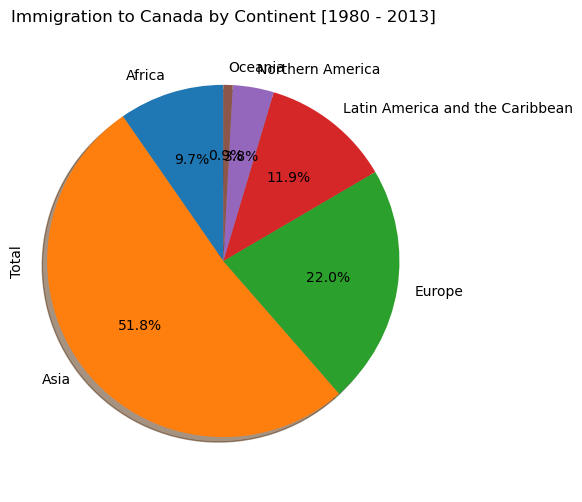

In [9]:
# autopct create %, start angle represent starting point

df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle
plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. So, let's make a few modifications to improve the visuals:
-  Replace the text labels on the pie chart with a separate legend by passing in legend using plt.legend().
-  Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
-  Pass in a custom set of colors for continents by passing in colors parameter.
-  Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter."

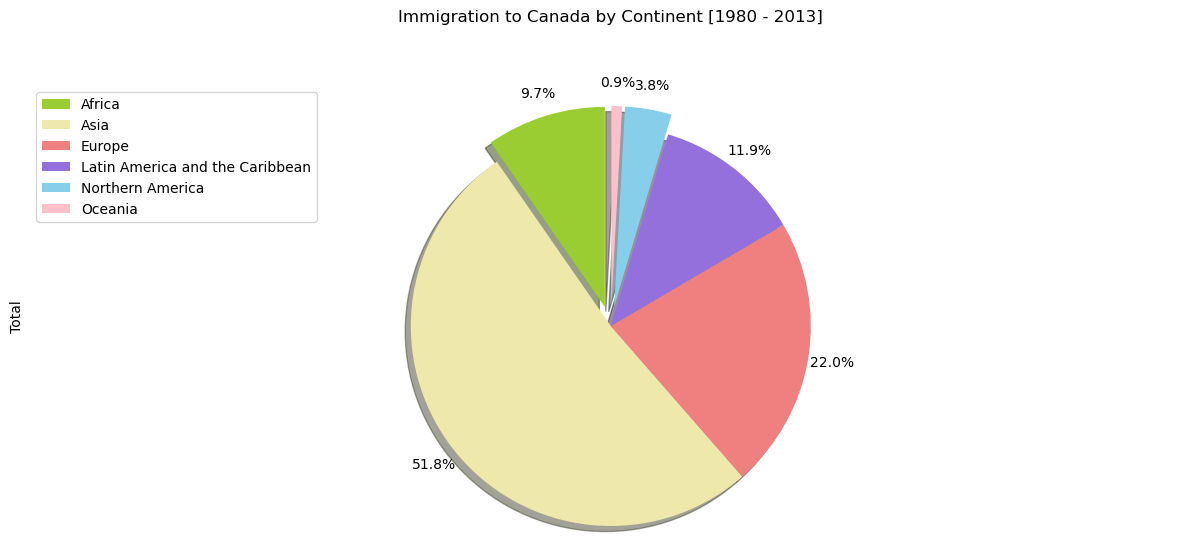

In [10]:
# Create a custom colors list

colors_list = ['yellowgreen', 'palegoldenrod', 'lightcoral', 'mediumpurple', 'skyblue', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
    
plt.axis('equal')
    
# add legend
plt.legend(labels=df_continents.index, loc='upper left')

#Now, let's see what the pie chart looks like
plt.show()

##### Exercise 1:

Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

#### Solution 1:

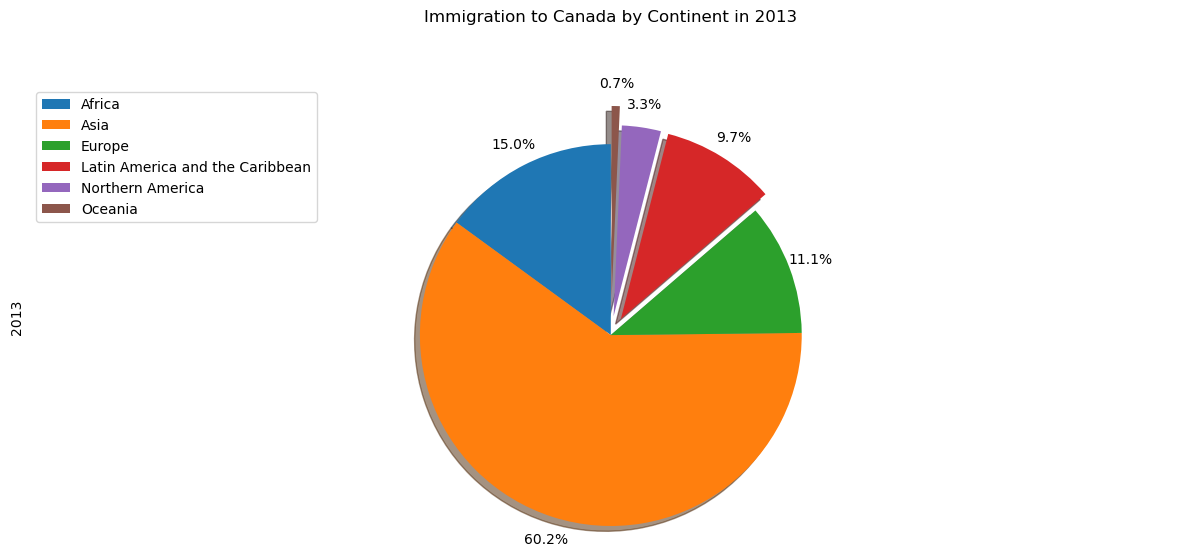

In [11]:
# You might need to play with the explore values in order to fix any overlapping slice values.

explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
df_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%',
                                startangle=90,
                                shadow=True,
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' lowest 3 continents
                                )
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12)
plt.axis('equal')

# add legend
plt.legend(labels=df_continents.index, loc='upper left')

# show plot
plt.show()

### 3.2. Box Plots

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimun:** Smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** Highest number in the dataset excluding the outliers.

To make a box plot, we can use kind=box in plot method invoked on a pandas series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

**Step 3.2.1: Get dataset.**

Even though the data required is for just one country, it will be obtained as a dataframe. This will help with calling the dataframe.describe() method to view the percentiles.

In [12]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


**Step 3.2.2: Plot the data**

Pass in `kind = 'box'` keyword, to generate the box plot:

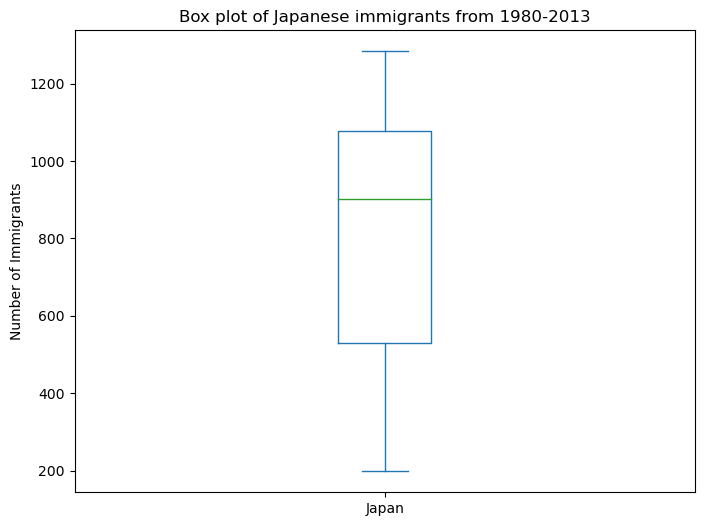

In [13]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

**A few key observations from the plot above:**

-  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
-  25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
-  75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).
   
We can view the actual numbers by calling the describe() method on the dataframe.

In [14]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Previously, I took the liberty of creating a bar chart race on the [Flourish](https://flourish.studio/) app to visualize the trend of immigrants to Canada using the same data in this project and I observed that China and India had similar trends. 

You may view the visualization here: <iframe src='https://flo.uri.sh/visualisation/13258677/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/13258677/?utm_source=embed&utm_campaign=visualisation/13258677' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div> 

Now, let's analyze the two countries further using box plots.

##### Exercise 2:

Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

##### Solution 2:

In [15]:
# Step 1: Create a dataframe for the data of interest

df_IC = df.loc[['India', 'China'], years].transpose()
df_IC.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


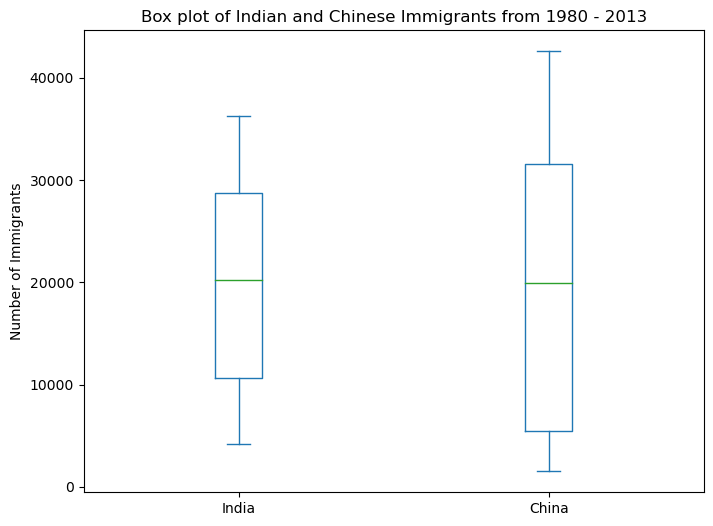

In [16]:
# Step 2: Plot boxplot

df_IC.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Indian and Chinese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

**A few key observations from the plot above:**

The minimum number of immigrants is around 5000 and 2000 (min), maximum number is around 36000 and 42000 (max), for India and China, respectively.

-  Median number of immigrants is around 20000 (median)for India and China, respectively.

-  25% of the years for period 1980 - 2013 had an annual immigrant count of ~11000 and ~5000 or fewer (First quartile) for India and China, respectively.

-  75% of the years for period 1980 - 2013 had an annual immigrant count of ~28000 and ~32000 or fewer (Third quartile) for India and China, respectively.

We can observe that, while both countries have around the same median immigrant population (~20,000), China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

In [17]:
# View the percentages associated with both countries using the describe() method.

df_IC.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


If you prefer to create horizontal box plots, you can pass the 'vert' parameter in the plot function and assign it to False. You can also specify a different color in case you are not a big fan of the default red color.

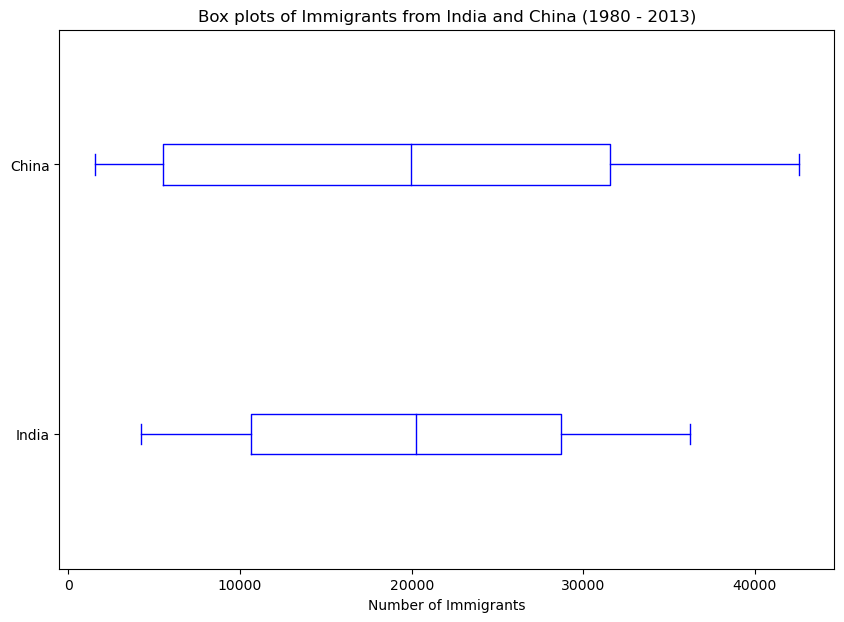

In [18]:
# horizontal box plots

df_IC.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from India and China (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
    ```

Where
    
*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \\* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \\* `ncols` as shown below:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width=500 align="center">

We can then specify which subplot to place each plot by passing in the ax paramemter in plot() method as follows:

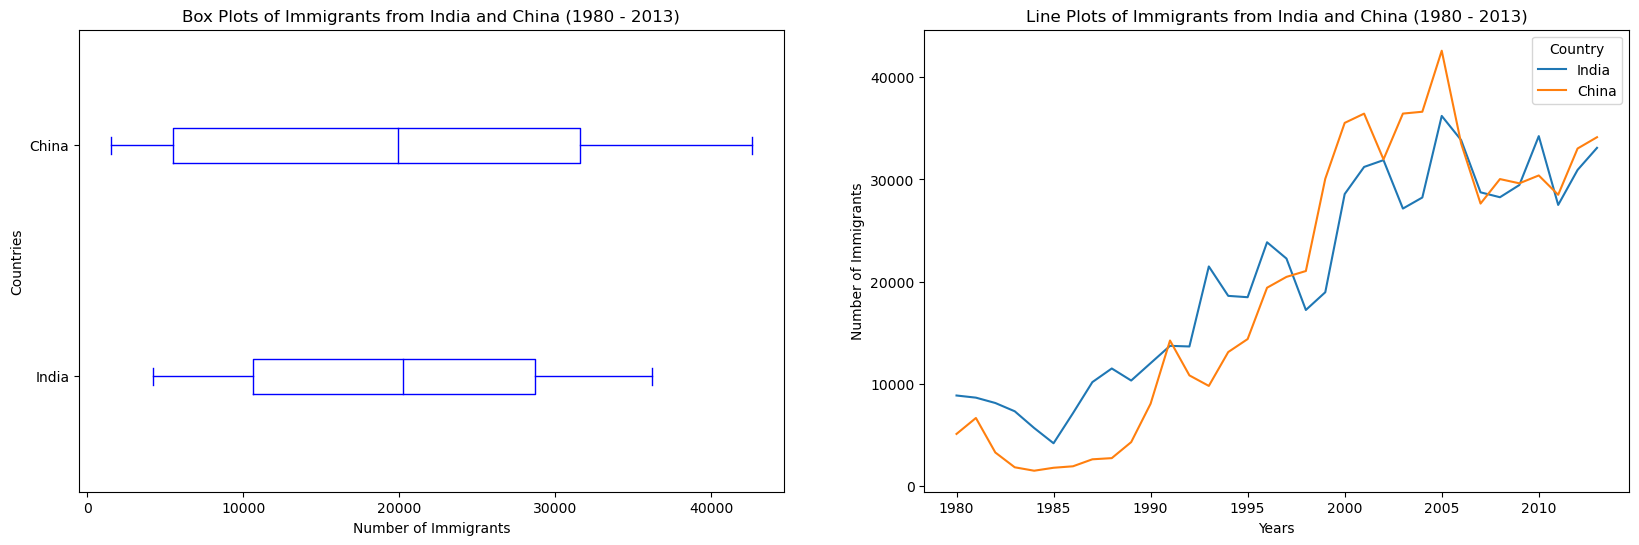

In [19]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_IC.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from India and China (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_IC.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from India and China (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Tip regarding subplot convention**

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that the a 3 digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance

```python
   subplot(211) == subplot(2, 1, 1)
   ```
produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

**Exercise 3:** 

Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

**Solution 3:**

**Step 1:** Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

In [20]:
df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


**Step 2:** Create a new dataframe which contains the aggregate for each decade. 

One way to do that is to create a list of all years in decades 80's, 90's, and 00's. Then slice the original dataframe (df) to create a series for each decade and sum across all years for each country.
Now, merge the three series into a new data frame. Call your dataframe new_df.

In [21]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s': df_00s})

# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [22]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


**Step 3:** Plot the box plots.

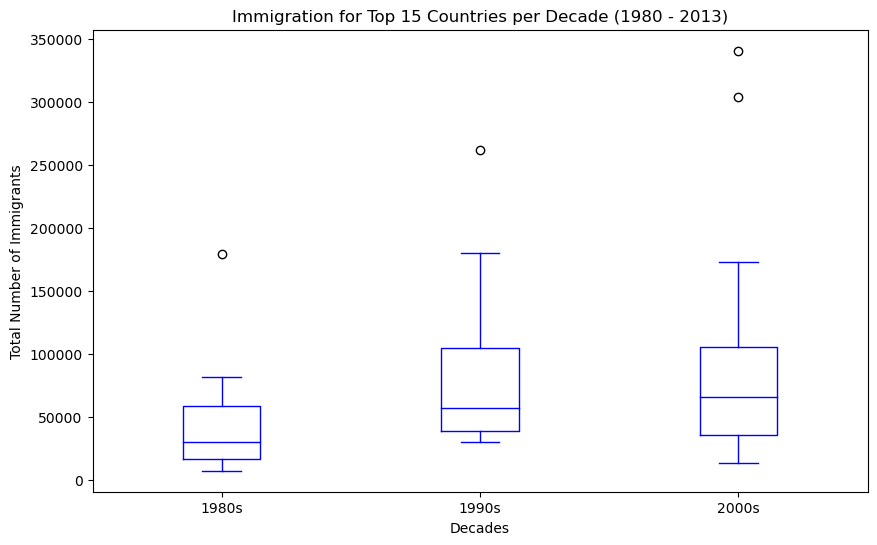

In [23]:
# horizontal box plots
new_df.plot(kind='box', figsize=(10, 6), color='blue')

plt.title('Immigration for Top 15 Countries per Decade (1980 - 2013)')
plt.ylabel('Total Number of Immigrants')
plt.xlabel('Decades')

plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.
 
Let's look at decade 2000s as an example: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 \\* 69,404) <br>
Outlier > 209,611.5"

In [24]:
# to check how many entreis fall above the outlier threshold\n",

new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

The box plot is an advanced visualizaiton tool, and there are many options and customizations that exceed the scope of this project. Please refer to [Matplotlib's documentation](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#boxplots) on box plots for more information.

### 3.3. Scatter Plots

A `scatter plot` is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. We can mathematically calculate this relationship With further analysis using tools like regression and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

**Step 3.3.1: Get dataset.**

Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

In [25]:
# we can use the sum() method to get the total population per year,
df_tot = pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


**Step 3.3.2: Plot the data** 

In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.

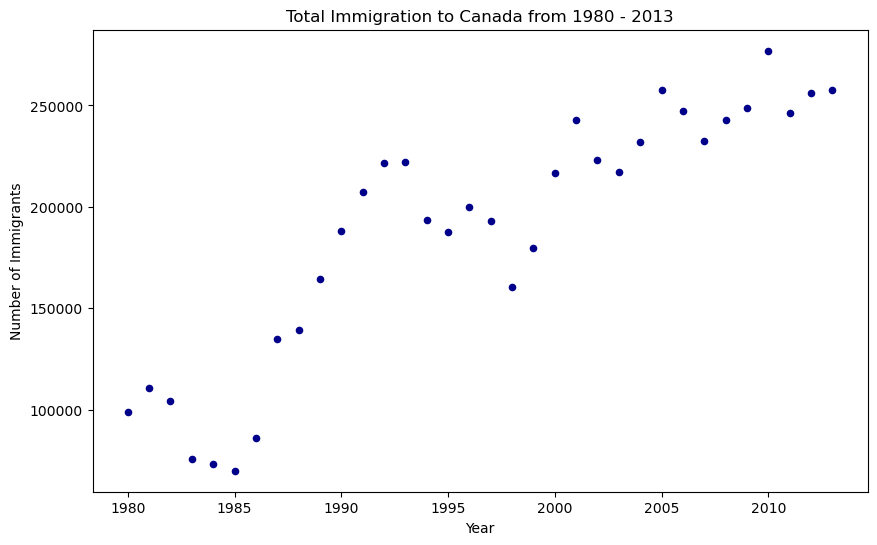

In [26]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Notice how the scatter plot does not connect the datapoints together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).
So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

**Scatter Plot with regression line:**

**Step 1:** Get the equation of line of best fit. 

We will use **Numpy**'s `polyfit()` method by passing in the following:

*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [27]:
# Equation of line of best fit

x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a*x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1.

**Step 2:** Plot the regression line on the `scatter plot`. 

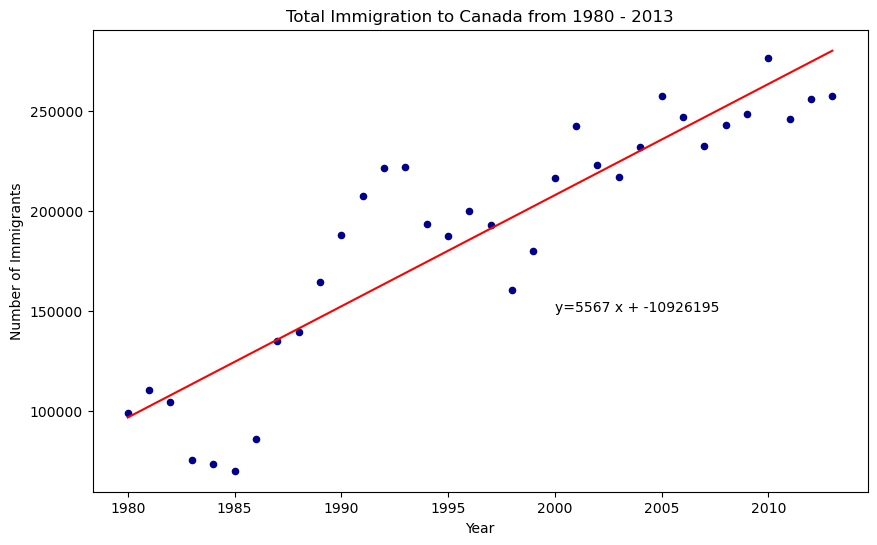

'Number of Immigrants = 5567 * Year + -10926195'

In [28]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()
# print out the line of best fit
'Number of Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

Using the equation of line of best fit, we can estimate the number of immigrants in 2015 as follows:

```python
Number of Immigrants = 5567 * Year - 10926195
Number of Immigrants = 5567 * 2015 - 10926195
Number of Immigrants = 291,310
```

When compared to the actuals from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer\\&utm_source=Exinfluencer\\&utm_content=000026UJ\\&utm_term=10006555\\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for \"assisted relatives\" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

**Exercise 4:** 

Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013.

**Solution 4:**

**Step 1:** Get the dataset.

1.  Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
2.  Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
3.  Reset the index in place.
4.  Rename the columns to **year** and **total**.
5.  Display the resulting dataframe.

In [29]:
# create df_countries dataframe
df_countries = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


**Step 2:** Generate the scatter plot by plotting the total versus year in df_total.

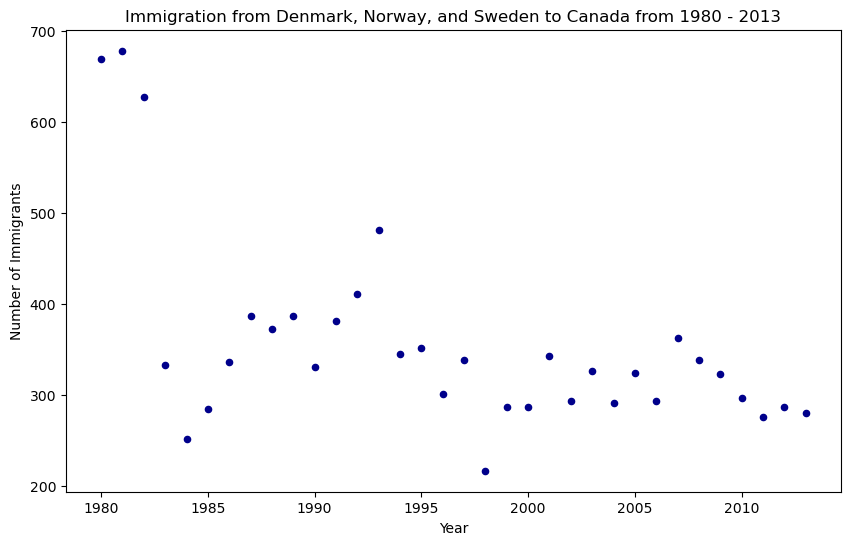

In [30]:
# Generate scatter plot

df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()

**Bonus:** Although, this exercise only requires a scatter plot, but to take it further, we could add a regression line to the scatter plot as folows:

In [31]:
# Define the equation of line of best fit

x = df_total['year']      # year on x-axis
y = df_total['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([-6.14698243e+00,  1.26281563e+04])

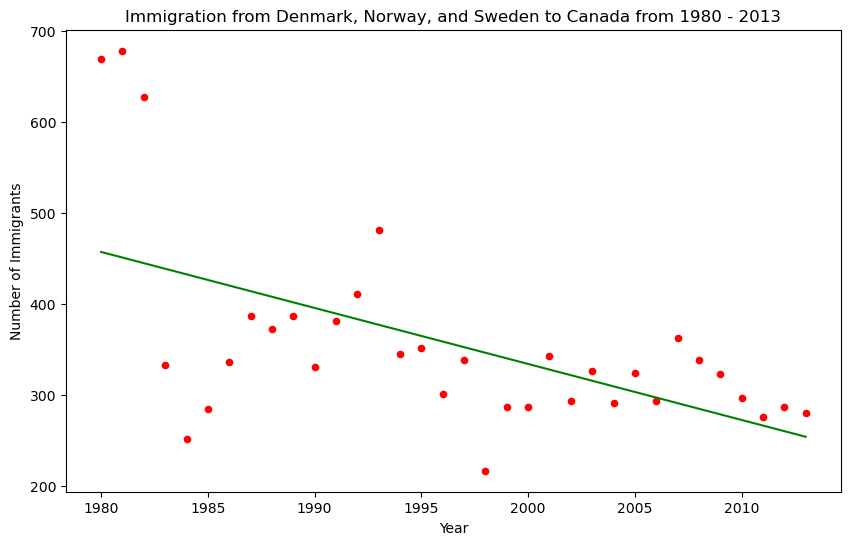

In [32]:
# Generate scatter plot

df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='red')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='green') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

### 3.4. Bubble Plot

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.

**Step 1:** Get the data for Brazil and Argentina. 

Like in the previous example, we will convert the Years to type 'int' and bring it in the dataframe.

In [33]:
df_can_t = df[years].transpose() # transposed dataframe
   
# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


**Step 2:** Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer\\&utm_source=Exinfluencer\\&utm_content=000026UJ\\&utm_term=10006555\\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range \\[0,1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where *`X`* is an original value, *`X'`* is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the datapoints are scaled to a value between 0-1 accordingly.

In [34]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())
   

**Step 3:** Generate the bubble plot.

To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
*   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
       *   multiply weights by 2000 to scale it up on the graph, and
       *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

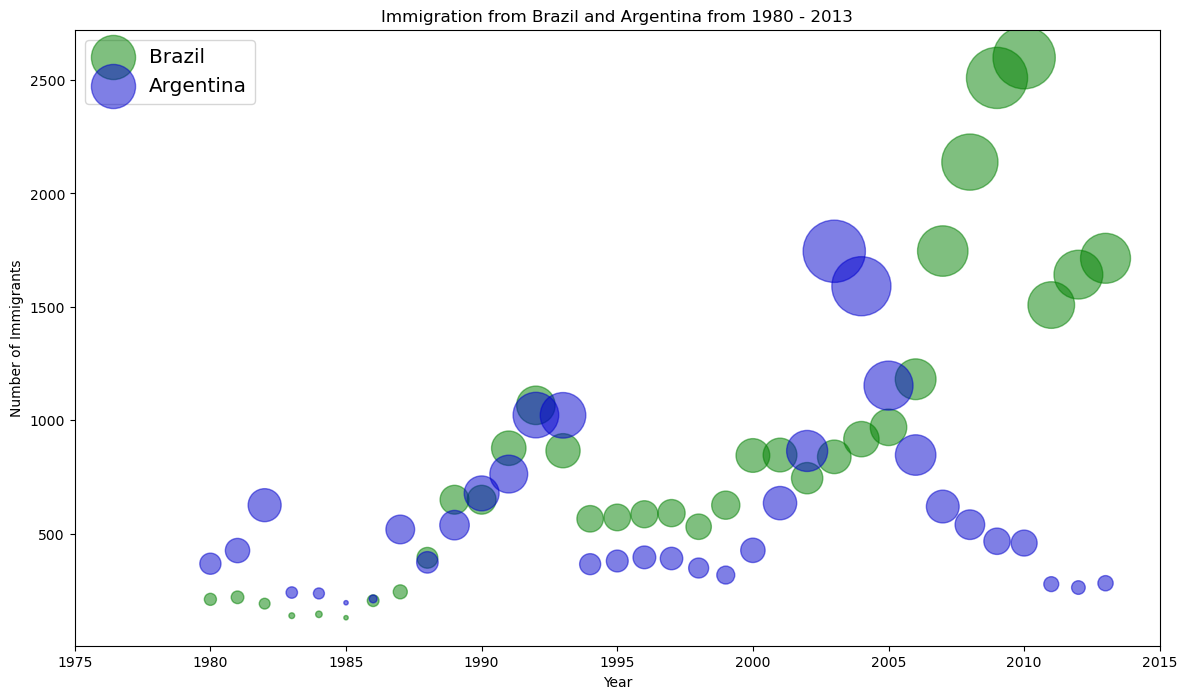

In [37]:
 # Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="mediumblue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')


**Note:** The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

**Verdict**

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

**Exercise 5:** 

Recall that earlier, we created box plots to compare immigration from China and India to Canada. Now, let's create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. We will include data from the Philippines too because these three countries contributed the highest number of immigrants to Canada from the Asian continent. We shall use **df_can_t** that was defined and used in the previous example.

**Solution 5:**

**Step 1:** Normalize the data pertaining to China, India and the Philippines.

In [46]:
# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

# normalize Philippines data
norm_philippines = (df_can_t['Philippines'] - df_can_t['Philippines'].min()) / (df_can_t['Philippines'].max() - df_can_t['Philippines'].min())

**Step 2:** Generate the bubble plots.

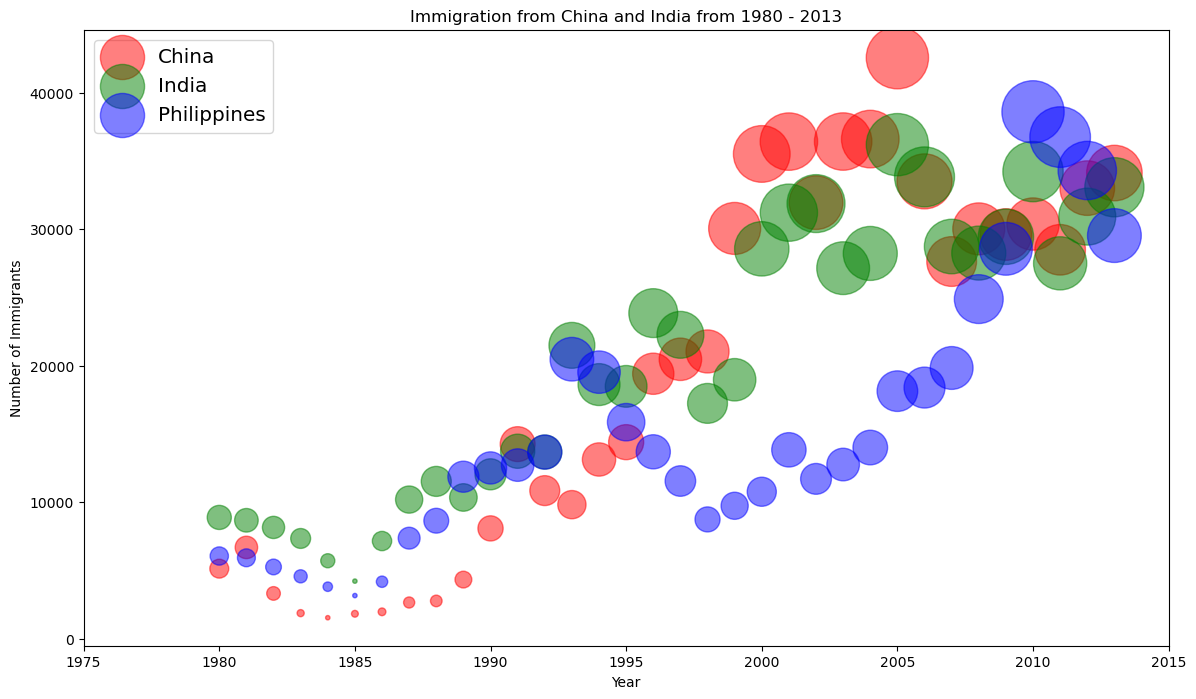

In [47]:
 # China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='red',
                    s=norm_china * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="green",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

# Philippines
ax2 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Philippines',
                    alpha=0.5,
                    color="blue",
                    s=norm_philippines * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India', 'Philippines'], loc='upper left', fontsize='x-large')


**Verdict:** 

The three countries in the plot above had similar trend till 1992. Philippines' number reduced between 1995 and 1998; and rose steadily afterwards. By 2019 onwards, all three countries had similar number of migrants entering Canada. 

**Bonus Exercise:** 

I am a Nigerian citizen currently living in Canada, so I'm curious about Nigeria's trend in this dataset. In this case, we shall compare Nigeria's trend with Ghana - a neighboring country in West africa and the second most populous country in the region after Nigeria.

Let's create bubble plots of immigration from Ghana and Nigeria to visualize any differences with time from 1980 to 2013. We will use **df_can_t** that was defined and used in the previous example.

**Bonus Solution:**

**Step 1:** Normalize the data pertaining to Ghana and Nigeria.

In [42]:
# normalize Ghana data
norm_ghana = (df_can_t['Ghana'] - df_can_t['Ghana'].min()) / (df_can_t['Ghana'].max() - df_can_t['Ghana'].min())

# normalize Nigeria data
norm_nigeria = (df_can_t['Nigeria'] - df_can_t['Nigeria'].min()) / (df_can_t['Nigeria'].max() - df_can_t['Nigeria'].min())

**Step 2:** Generate the bubble plots.

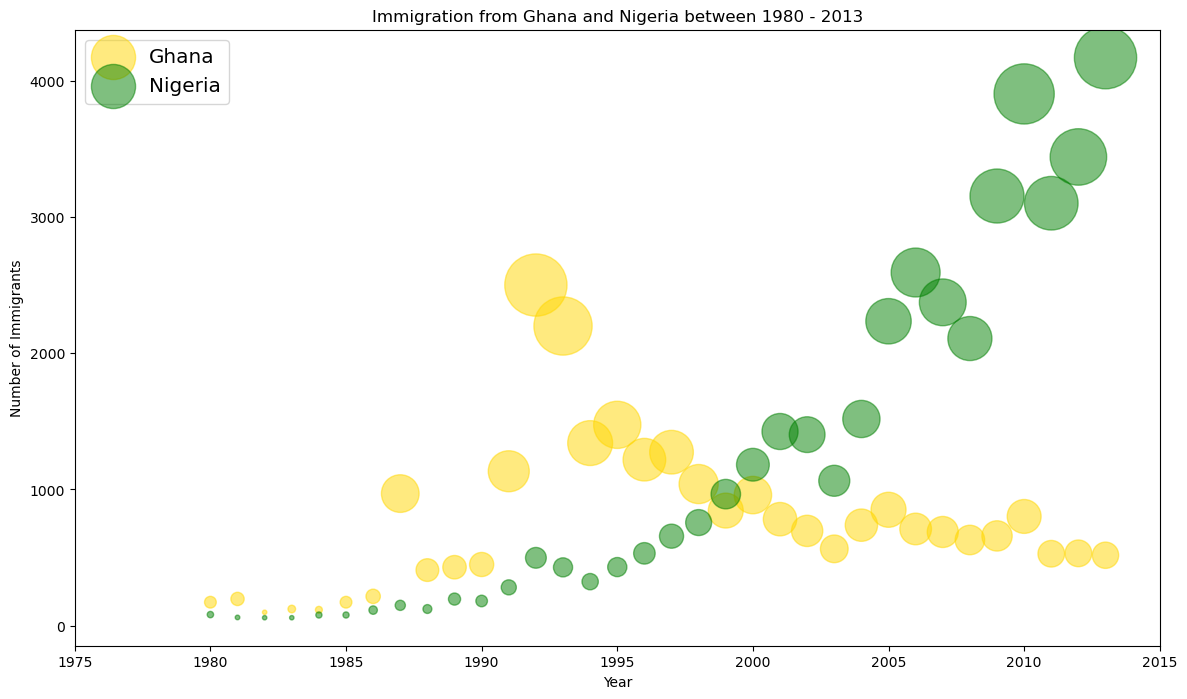

In [43]:
 # Ghana
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Ghana',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='gold',
                    s=norm_ghana * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                   )

# Nigeria
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Nigeria',
                    alpha=0.5,
                    color="green",
                    s=norm_nigeria * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Ghana and Nigeria between 1980 - 2013')
ax0.legend(['Ghana', 'Nigeria'], loc='upper left', fontsize='x-large')

**Verdict**


According to a [2018 World Migration Report](https://www.iom.int/sites/g/files/tmzbdl486/files/country/docs/china/r5_world_migration_report_2018_en.pdf) quoted in [an article on forced migration by Olivia Giovetti](https://www.concernusa.org/story/forced-migration-causes/), one of the biggest factors for migration are the economic challenges that may affect individuals in their countries of origin. This is likely the reason for the trend observed in the plot above. We can see that migration from Ghana was comparatively significantly higher between the late 1980s and the late 1990s - peaking around 1992-1993.  At that time, Ghana was faced with a plethora of economic challenges that triggered a mass migration of Ghanaians to other countries within West Africa and beyond. This number has slowed afterwards as the country became more politically stable and their economy recovered. 

Alternatively, the number of migrants from Nigeria grew at an alarming rate in the 2000s due to growing economic challenges. This number is expected to rise higher due to economic factors such as [growing unemployment rate (+25.74%)](https://www.statista.com/statistics/1119375/unemployment-rate-in-nigeria-by-quarter/) and [declining business confidence index](https://www.statista.com/statistics/1119424/business-confidence-index-in-nigeria/); and immigration programs created by the Government of Canada to attract educated skilled workers around the world.

### Conclusion

A key objective of this exploratory data analysis is to get a clear picture of the 'what' i.e. a visualization of the influx of migrants into Canada. However, to uncover these insights into the 'why' behind this trend, economic and other demographic data should be layered on top of these charts to connect the dots between the causes and the effects.

For example, some research into UN demographic data show that economic indicators - such as life expectancy, unemployment rate, inflation and security - are the some of the underlying factors that may have contributed to this trend in developing countries. 